<a href="https://colab.research.google.com/github/kontelk/deep-learning-in-cybersecurity/blob/main/Tor_Net_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Eντοπισμός εφαρμογών του δικτύου Tor**



## **Στόχος:**
Το παρακάτω ευφυές σύστημα δημιουργήθηκε για τον αυτόματο εντοπισμό όλου του περιεχομένου ή των εφαρμογών που προέρχονται από το δίκτυο Tor καθώς το δίκτυο του Οργανισμού δεν έχει πρόσβαση στο δίκτυο Tor.

## **Εισαγωγή Βιβλιοθηκών - Πακέτων:**

Γίνεται εισαγωγή των κατάλληλων βιβλιοθηκών - πακέτων της Python για την εκτέλεση του παραδείγματος.

In [ ]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Σύνολο Δεδομένων:**

Το σύνολο δεδομένων σχετίζεται με το σκοτεινό διαδίκτυο. Ο όρος σκοτεινό διαδίκτυο (darknet ή darkweb) αναφέρεται σε ένα ιδιωτικό και συχνά κρυφό δίκτυο όπου οι συνδέσεις γίνονται μόνο μεταξύ αξιόπιστων ομοτίμων χρησιμοποιώντας μη τυπικά πρωτόκολλα και θύρες, δεν αποτελεί μέρος του γνωστού διαδικτύου, δεν ευρετηριάζεται από τις μηχανές αναζήτησης και δεν είναι προσβάσιμο στο ευρύ κοινό με συμβατικά μέσα πλοήγησης. Το σύνολο δεδομένων το οποίο εμπεριέχεται σε ένα csv αρχείο, περιλαμβάνει 10000 περιπτώσεις (instances), από τις οποίες οι 5000 περιπτώσεις είναι phishing URLs και οι υπόλοιπες 5000 καλοήθεις.

Το σύνολο δεδομένων υπάρχει ως αρχείο csv στην θέση [/EKPA/Data/DarkNet.csv](https://github.com/kdemertzis/EKPA/blob/main/Data/DarkNet.csv)

In [ ]:
#εισαγωγή του συνόλου δεδομένων
data0 = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/DarkNet.csv')
data0.head()

<ipython-input-2-b3fbd22d29bb>:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data0 = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/DarkNet.csv')


,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label-1,Label-2
0,10.152.152.11,57158,216.58.220.99,443,6,229,1,1,0,0,...,0,0,0,0,0,0.000,0,0,Non-Tor,AUDIO-STREAMING
1,10.152.152.11,57159,216.58.220.99,443,6,407,1,1,0,0,...,0,0,0,0,0,0.000,0,0,Non-Tor,AUDIO-STREAMING
2,10.152.152.11,57160,216.58.220.99,443,6,431,1,1,0,0,...,0,0,0,0,0,0.000,0,0,Non-Tor,AUDIO-STREAMING
3,10.152.152.11,49134,74.125.136.120,443,6,359,1,1,0,0,...,0,0,0,0,0,0.000,0,0,Non-Tor,AUDIO-STREAMING
4,10.152.152.11,34697,173.194.65.127,19305,6,10778451,591,400,64530,6659,...,0,0,0,0,1437760000000000,3117718.131,1437760000000000,1437760000000000,Non-Tor,AUDIO-STREAMING


## **Έλεγχος Δεδομένων**
Σε αυτό το βήμα, πραγματοποιούνται κάποιες μέθοδοι ελέγχου για την εξέταση των δεδομένων και των χαρακτηριστικών τους.

In [ ]:
#έλεγχος του σχήματος του συνόλου δεδομένων
data0.shape

(68580, 83)

In [ ]:
#εξέταση των χαρακτηριστικών του συνόλου δεδομένων
data0.columns

Index(['Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol', 'Flow_Duration',
       'Total_Fwd_Packet', 'Total_Bwd_packets', 'Total_Length_of_Fwd_Packet',
       'Total_Length_of_Bwd_Packet', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes/s', 'Flow_Packets/s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s',
       'Packet_Length_Min', 'Packet_Length_Max', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag

In [ ]:
#πληροφορίες για τα χαρακτηριστικά του συνόλου δεδομένων
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68580 entries, 0 to 68579
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Src_IP                      68580 non-null  object 
 1   Src_Port                    68580 non-null  int64  
 2   Dst_IP                      68580 non-null  object 
 3   Dst_Port                    68580 non-null  int64  
 4   Protocol                    68580 non-null  int64  
 5   Flow_Duration               68580 non-null  int64  
 6   Total_Fwd_Packet            68580 non-null  int64  
 7   Total_Bwd_packets           68580 non-null  int64  
 8   Total_Length_of_Fwd_Packet  68580 non-null  int64  
 9   Total_Length_of_Bwd_Packet  68580 non-null  int64  
 10  Fwd_Packet_Length_Max       68580 non-null  int64  
 11  Fwd_Packet_Length_Min       68580 non-null  int64  
 12  Fwd_Packet_Length_Mean      68580 non-null  float64
 13  Fwd_Packet_Length_Std       685

## **Οπτικοποίηση Δεδομένων**
Πραγματοποιείται οπτικοποίηση μέσω γραφημάτων για τον οπτικό προσδιορισμό του πώς κατανέμονται τα δεδομένα και πώς σχετίζονται τα χαρακτηριστικά μεταξύ τους.

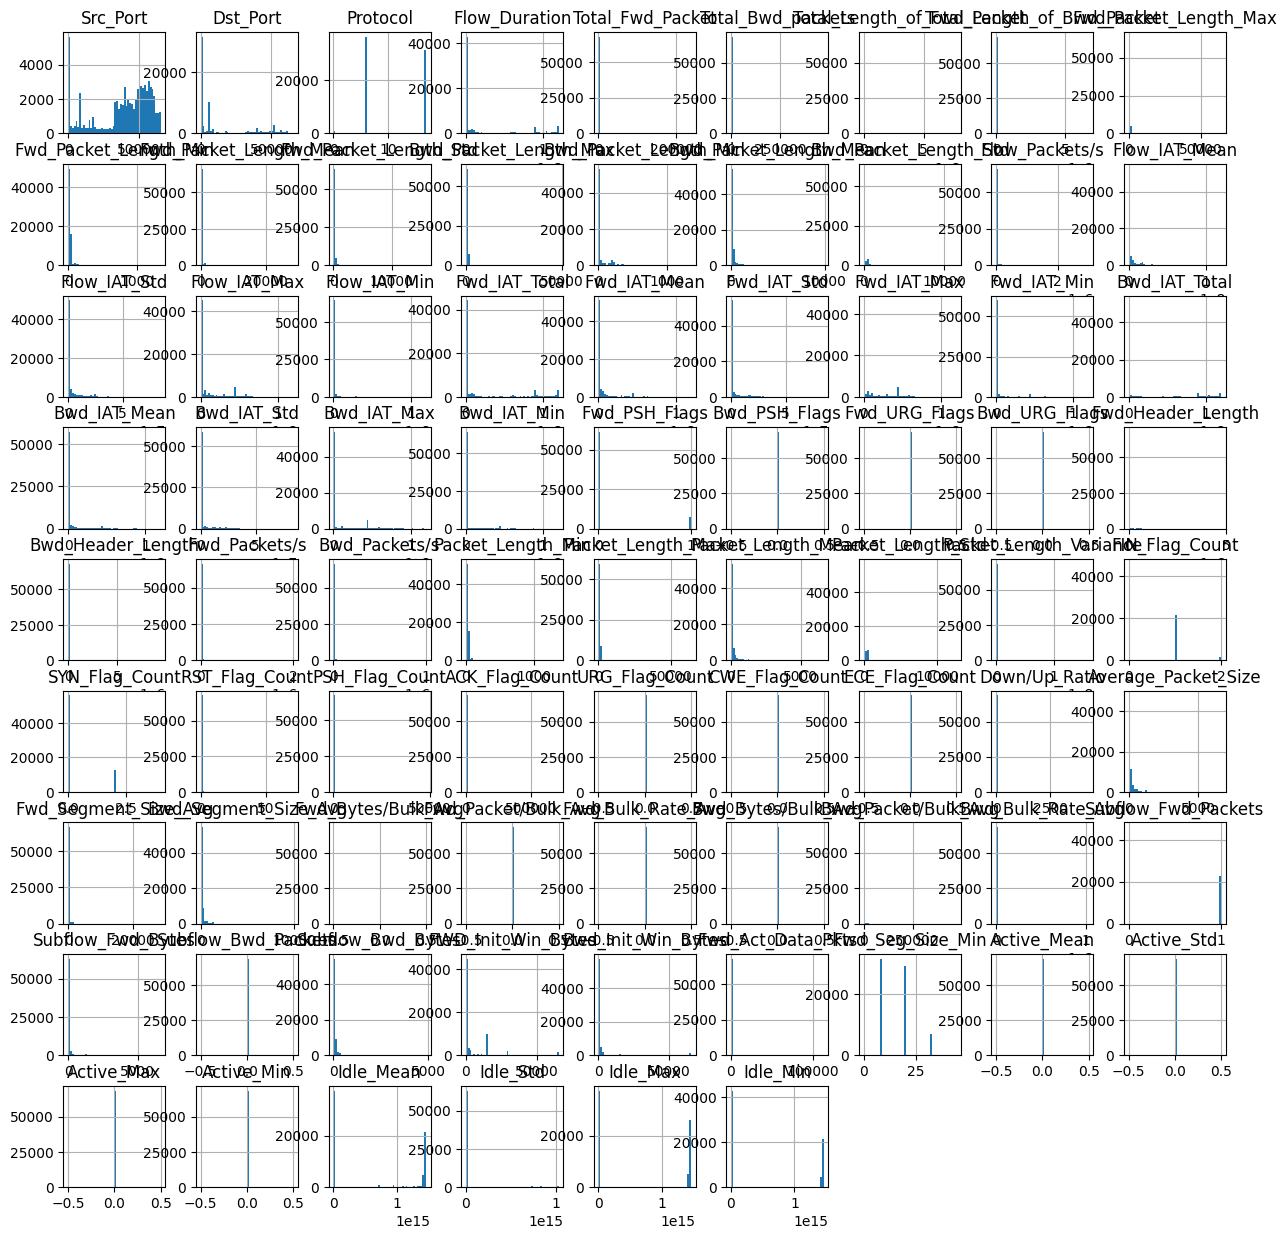

In [ ]:
# Replace infinite values with NaN
data0 = data0.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values in the columns you want to plot
# If you want to keep all rows, consider imputing the missing values instead
data0 = data0.dropna(subset=[column for column in data0.select_dtypes(include=np.number).columns if column != 'Domain'])

#οπτικοποίηση της κατανομής των δεδομένων
data0.hist(bins = 50,figsize = (15,15))
plt.show()

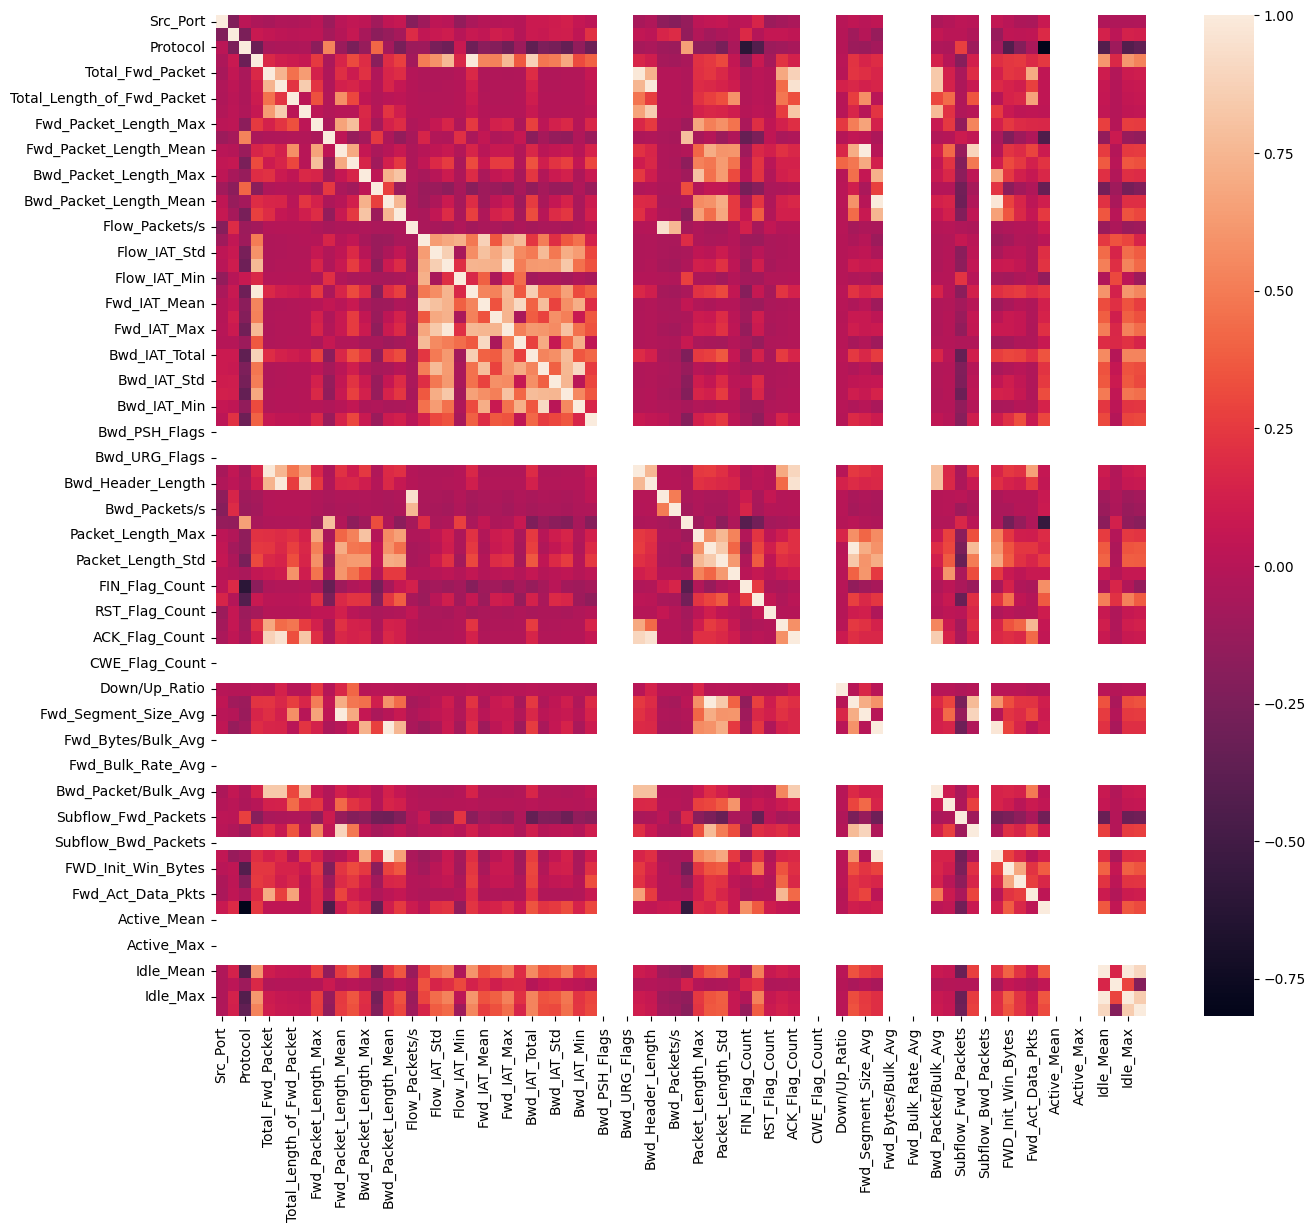

In [ ]:
#πίνακας συσχέτισης χαρακτηριστικών του συνόλου δεδομένων
plt.figure(figsize=(15,13))
# Exclude non-numeric columns from correlation calculation
sns.heatmap(data0.select_dtypes(include=np.number).corr())
plt.show()

## **Προεπεξεργασία Δεδομένων και Διερευνητική Ανάλυση Δεδομένων**
Καθαρισμός δεδομένων εφαρμόζοντας τεχνικές προεπεξεργασίας και μετατροπή τους σε κατάλληλη μορφοποίηση ώστε να χρησιμοποιηθούν από τα μοντέλα ΜΜ.

In [ ]:
#περιγραφικά στατιστικά µέτρα του συνόλου δεδομένων
data0.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,68531.000000,68531.000000,68531.000000,6.853100e+04,68531.000000,68531.000000,6.853100e+04,6.853100e+04,68531.000000,68531.000000,...,68531.000000,68531.000000,68531.0,68531.0,68531.0,68531.0,6.853100e+04,6.853100e+04,6.853100e+04,6.853100e+04
mean,39750.503918,14211.906145,10.982358,2.407190e+07,291.473144,284.932556,2.288211e+05,2.420316e+05,229.208708,18.961711,...,188.493076,15.518058,0.0,0.0,0.0,0.0,6.299195e+14,4.878969e+13,6.545541e+14,5.411862e+14
std,19345.707740,20240.245184,5.577696,4.050544e+07,3400.661341,4875.097528,4.669247e+06,6.524393e+06,846.575279,36.295951,...,2261.335413,8.090545,0.0,0.0,0.0,0.0,6.985004e+14,1.820734e+14,7.180328e+14,6.982751e+14
min,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,32935.500000,80.000000,6.000000,1.227205e+05,1.000000,0.000000,1.000000e+00,0.000000e+00,1.000000,0.000000,...,0.000000,8.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,45141.000000,4455.000000,6.000000,4.201550e+05,2.000000,1.000000,4.400000e+01,0.000000e+00,33.000000,0.000000,...,1.000000,20.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,54717.000000,28043.000000,17.000000,2.726589e+07,5.000000,3.000000,3.360000e+02,2.180000e+02,108.000000,33.000000,...,2.000000,20.000000,0.0,0.0,0.0,0.0,1.433530e+15,1.811767e+07,1.437150e+15,1.433530e+15
max,65534.000000,65533.000000,17.000000,1.200000e+08,238161.000000,470862.000000,7.693074e+08,6.704287e+08,64240.000000,1350.000000,...,113325.000000,44.000000,0.0,0.0,0.0,0.0,1.460000e+15,1.030000e+15,1.460000e+15,1.460000e+15


Οι παρακάτω στήλες θα απορριφθούν καθώς δεν έχουν καμία αξία για την εκπαίδευση του μοντέλου ΜΜ, οπότε μπορεί να γίνει απόρριψη τους από το συγκεκριμένο σύνολο δεδομένων.

In [ ]:
#απόρριψη στηλών από το σύνολο δεδομένων
data = data0.drop(['Src_IP'], axis = 1).copy()
data = data.drop(['Src_Port'], axis = 1).copy()
data = data.drop(['Dst_IP'], axis = 1).copy()
data = data.drop(['Dst_Port'], axis = 1).copy()
data = data.drop(['Label-2'], axis = 1).copy()

Μετά την παραπάνω απόρριψη το σύνολο αποτελείται από 16 ανεξάρτητες μεταβλητές και μια μεταβλητή στόχο (εξαρτημένη μεταβλητή).

In [ ]:
#έλεγχος των δεδομένων για κενές ή ελλείπουσες τιμές
data.isnull().sum()

,0
Protocol,0
Flow_Duration,0
Total_Fwd_Packet,0
Total_Bwd_packets,0
Total_Length_of_Fwd_Packet,0
...,...
Idle_Mean,0
Idle_Std,0
Idle_Max,0
Idle_Min,0


Προκειμένου να εξομαλυνθεί η διαδικασίας της τμηματοποίησης, τα δεδομένα ανακατεύονται προκειμένου να αποφεύγει η περίπτωση υπερβολικής τοποθέτησης (overfitting) κατά την εκπαίδευση των μοντέλων. Ανακατεύοντας τις σειρές στο σύνολο δεδομένων, εξασφαλίζεται ότι κατά τον διαχωρισμό τα σύνολα εκπαίδευσης και δοκιμών κατανέμονται αντικειμενικά.

In [ ]:
# ανακάτεμα δεδομένων
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label-1
0,6,101116635,218,326,11663,357274,1045,0,53.500000,122.172510,...,20,0,0,0,0,1438110000000000,5.874706e+06,1438110000000000,1438110000000000,Non-Tor
1,17,411029,2,0,44,0,22,22,22.000000,0.000000,...,8,0,0,0,0,0,0.000000e+00,0,0,NonVPN
2,6,3842,2,0,0,0,0,0,0.000000,0.000000,...,20,0,0,0,0,0,0.000000e+00,0,0,NonVPN
3,6,107964035,26,26,1583,16422,508,0,60.884615,134.791195,...,20,0,0,0,0,1456260000000000,2.969109e+07,1456260000000000,1456260000000000,Non-Tor
4,6,212,2,0,0,0,0,0,0.000000,0.000000,...,20,0,0,0,0,0,0.000000e+00,0,0,NonVPN


Τα δεδομένα είναι πλέον έτοιμα για την εκπαίδευση των μοντέλων ΜΜ.

## **Τμηματοποίηση Δεδομένων**

In [ ]:
#διαχωρισμός και εκχώρηση ανεξάρτητων μεταβλητών σε X και μεταβλητών στόχων σε y
y = data['Label-1']
X = data.drop('Label-1',axis=1)
X.shape, y.shape

((68531, 77), (68531,))

In [ ]:
#τμηματοποίηση δεδομένων σε σύνολο εκπαίδευσης με 80% και σύνολο δοκιμών με 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((54824, 77), (13707, 77))

## **Μοντέλα ΜΜ και Διαδικασία Εκπαίδευσης**

Από το παραπάνω σύνολο δεδομένων, είναι σαφές ότι πρόκειται για μια εποπτευόμενη εργασία ΜΜ (supervised learning). Συγεκριμένα, το πρόβλημα το οποίο εξετάζεται, αντιμετωπίζεται ως πρόβλημα ταξινόμησης (classification), καθώς η κάθε περίπτωση ταξινομείται ως Tor ή Non-Tor.
Στην περίπτωση χρήσης που εξετάζεται, χρησιμοποιούνται οι παρακάτω αλγόριθμοι ταξινόμησης ως εποπτευόμενα μοντέλα ΜΜ:

* Decision Tree
* Random Forest



In [ ]:
#εισαγωγή πακέτων
from sklearn.metrics import accuracy_score

In [ ]:
#δημιουργία αποθετηρίων για την αποθήκευση των αποτελεσμάτων απόδοσης των μοντέλων
ML_Model = []
acc_train = []
acc_test = []

#συναρτηση κλήσης για αποθήκευση των αποτελεσμάτων
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### **Decision Tree**
 Decision Tree (δέντρο αποφάσεων). Είναι ένας μη παραμετρικός εποπτευόμενος αλγόριθμος μάθησης, ο οποίος έχει μια ιεραρχική, δεντρική δομή, η οποία αποτελείται από έναν κόμβο ρίζας, κλάδους, εσωτερικούς κόμβους και κόμβους φύλλων. Ο αλγόριθμος αναζητά όλες τις πιθανές δοκιμές και βρίσκει αυτό που είναι πιο κατατοπιστικό για τη μεταβλητή στόχο.

In [ ]:
#Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

#παρουσίαση μοντέλου
tree = DecisionTreeClassifier(max_depth = 5)
#έλεγχος καταλληλότητας μοντέλου
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#πρόβλεψη της τιμής στόχου από το μοντέλο
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Αξιολόγηση Απόδοσης:**

In [ ]:
#πολογισμός της ακρίβειας του μοντέλου
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.870
Decision Tree: Accuracy on test Data: 0.867


**Αποθήκευση Αποτελεσμάτων:**

In [ ]:
#αποθήκευση αποτελεσμάτων
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **Random Forest**
Random Forest (τυχαίο δάσος). Είναι ένας ευρέως χρησιμοποιούμενος αλγόριθμος ΜΜ, ο οποίος συνδυάζει την έξοδο πολλαπλών δέντρων αποφάσεων για να φτάσει σε ένα μόνο αποτέλεσμα. Κάθε δέντρο μπορεί να κάνει μια σχετικά καλή δουλειά στην πρόβλεψη, αλλά πιθανότατα θα υπερισχύσει σε κάποιο μέρος των δεδομένων. Εάν χτίσουμε πολλά δέντρα, τα οποία λειτουργούν καλά και προσαρμόζονται με διαφορετικούς τρόπους, μπορούμε να μειώσουμε την ποσότητα της υπερπροσαρμογής (overfitting) υπολογίζοντας τον μέσο όρο των αποτελεσμάτων τους.

In [ ]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier

#παρουσίαση μοντέλου
forest = RandomForestClassifier(max_depth=5)

#έλεγχος καταλληλότητας μοντέλου
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#πρόβλεψη της τιμής στόχου από το μοντέλο
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Αξιολόγηση Απόδοσης:**

In [ ]:
#υπολογισμός της ακρίβειας του μοντέλου
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.905
Random forest: Accuracy on test Data: 0.899


**Αποθήκευση Αποτελεσμάτων:**

In [ ]:
#αποθήκευση αποτελεσμάτων
storeResults('Random Forest', acc_train_forest, acc_test_forest)

## **Σύγκριση Μοντέλων**
Δημιουργία ενός πλαισίου δεδομένων (dataframe) για την σύγκριση της απόδοσης των μοντέλων.

In [ ]:
#δημιουργία πλαισίου δεδομένων (dataframe)
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.870,0.867
1,Random Forest,0.905,0.899


In [ ]:
#ταξινόμηση του πλαισίου δεδομένων (dataframe) με βάση την ακρίβεια (Accuracy) των μοντέλων
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
1,Random Forest,0.905,0.899
0,Decision Tree,0.870,0.867


Για την παραπάνω σύγκριση, είναι σαφές ότι ο ταξινομητής **Random Forest** λειτουργεί εποτελεσματικότερα γι αυτό το σύνολο δεδομένων.